<a href="https://colab.research.google.com/github/edisonc57/Inzhiniring-gazovykh-rezervuarov/blob/main/%D0%93%D0%BB%D0%B0%D0%B2%D0%B0%2001%20-%20%D0%A1%D0%B2%D0%BE%D0%B9%D1%81%D1%82%D0%B2%D0%B0%20%D0%BF%D1%80%D0%B8%D1%80%D0%BE%D0%B4%D0%BD%D1%8B%D1%85%20%D0%B3%D0%B0%D0%B7%D0%BE%D0%B2/%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82/Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Псевдокритические свойства

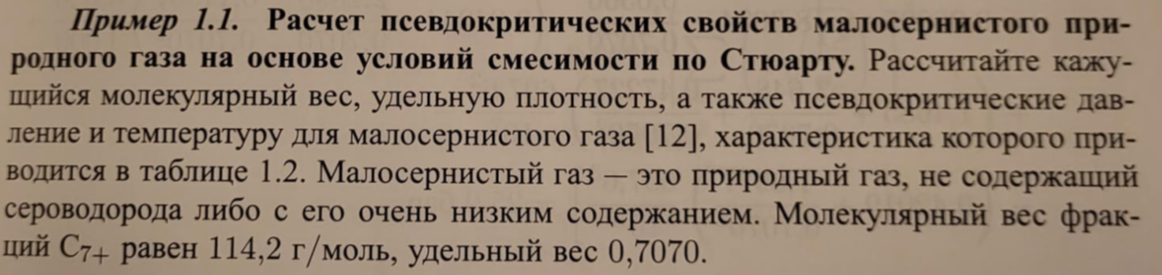

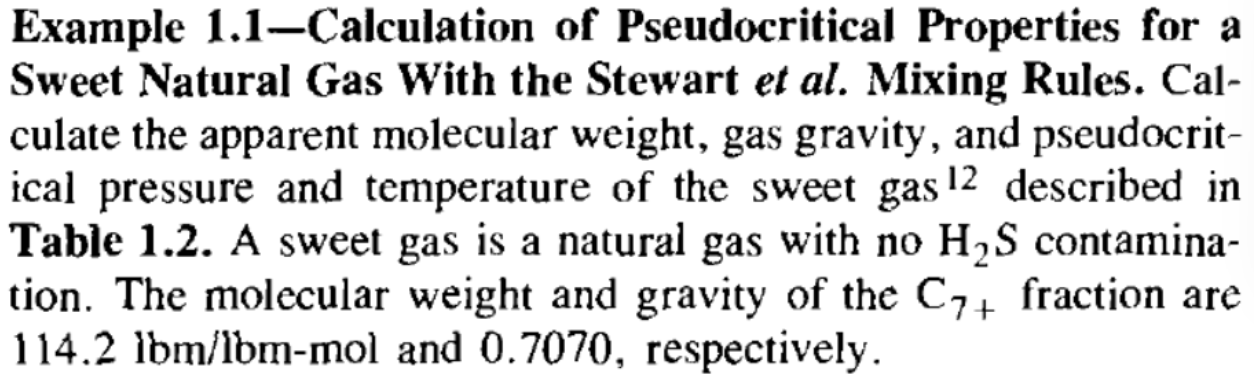

In [14]:
import pandas as pd
import numpy as np

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/edisonc57/Inzhiniring-gazovykh-rezervuarov/bb2884aba898b9f37fd872540a3fbe6b39dda69b/%D0%93%D0%BB%D0%B0%D0%B2%D0%B0%2001%20-%20%D0%A1%D0%B2%D0%BE%D0%B9%D1%81%D1%82%D0%B2%D0%B0%20%D0%BF%D1%80%D0%B8%D1%80%D0%BE%D0%B4%D0%BD%D1%8B%D1%85%20%D0%B3%D0%B0%D0%B7%D0%BE%D0%B2/%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5/Table%201.2.csv')

In [16]:
print(df.head(10))

    Component   Mole fraction   Molecular Weight  Critical temperature  \
0    Nitrogen          0.0138             28.013               126.200   
1      Methan          0.9302             16.043               190.560   
2      Ethane          0.0329             30.070               305.330   
3     Propane          0.0136             44.097               369.850   
4   Iso-Butan          0.0023             58.123                407.85   
5     N-Butan          0.0037             58.123                425.16   
6  Isopentane          0.0012             72.150                460.43   
7   N-pentane          0.0010             72.150                469.71   
8      Hexane          0.0008             86.177                507.37   
9   Heptane +          0.0005            114.231                     -   

   Critical pressure  
0             34.000  
1             45.900  
2             48.700  
3             42.500  
4               36.4  
5               38.0  
6               33.8  
7

In [17]:
Tabla=pd.DataFrame(df)

In [18]:
print(Tabla.dtypes)

Component                 object
 Mole fraction           float64
 Molecular Weight        float64
 Critical temperature     object
 Critical pressure        object
dtype: object


In [19]:
MC7plus= 114.2
GC7plus= 0.7070

In [20]:
#Темпервтура кипения
Tbplus=5/9 * ((4.5579*(MC7plus**0.15178)*(GC7plus**0.15427))**3)
print("Темпервтура кипения : ", Tbplus, "K")

Темпервтура кипения :  387.4979017731816 K


In [21]:
#Псевдокритическое давление
Ppplus= 0.06895 * np.exp( 8.3634 -(0.0566/GC7plus) -
                        ((0.24244 + (2.2898/GC7plus) + (0.11857/GC7plus**2)) * (9*Tbplus/5000)) +
                        ((1.4685 + (3.648/GC7plus)+ (0.47227/GC7plus**2))* ((9*Tbplus/5)**2/(10**7))-
                        ((0.42019 + 1.6977/GC7plus**2)* ((9*Tbplus/5)**3/(10**10)))))

print(Ppplus, "bar или", Ppplus*14.5, "psia")

25.90198225730165 bar или 375.57874273087396 psia


In [22]:
#Псевдокритическая температура
Tpcplus = 5/9 * ((341.7 + 811 * GC7plus) + ((0.4244 + 0.1174*GC7plus)*(9*Tbplus/5)) +
                 ((0.4669 - 3.2623*GC7plus)*(10**5/(9*Tbplus/5))))
print(Tpcplus, "K")


558.4734462140145 K


In [23]:
print(Tabla.columns.values)

['Component' ' Mole fraction' ' Molecular Weight' ' Critical temperature'
 ' Critical pressure']


In [24]:
#добавляем новые данные в таблицу
Tabla.at[9, ' Critical temperature'] = Tpcplus
Tabla.at[9, ' Critical pressure'] = Ppplus

In [25]:
print(Tabla)

    Component   Mole fraction   Molecular Weight  Critical temperature  \
0    Nitrogen          0.0138             28.013               126.200   
1      Methan          0.9302             16.043               190.560   
2      Ethane          0.0329             30.070               305.330   
3     Propane          0.0136             44.097               369.850   
4   Iso-Butan          0.0023             58.123                407.85   
5     N-Butan          0.0037             58.123                425.16   
6  Isopentane          0.0012             72.150                460.43   
7   N-pentane          0.0010             72.150                469.71   
8      Hexane          0.0008             86.177                507.37   
9   Heptane +          0.0005            114.231            558.473446   

   Critical pressure  
0             34.000  
1             45.900  
2             48.700  
3             42.500  
4               36.4  
5               38.0  
6               33.8  
7

In [26]:
Tabla[' Critical temperature'] = pd.to_numeric(df[' Critical temperature'], errors='coerce')
Tabla[' Critical pressure'] = pd.to_numeric(df[' Critical pressure'], errors='coerce')

In [27]:
print(Tabla.dtypes)

Component                 object
 Mole fraction           float64
 Molecular Weight        float64
 Critical temperature    float64
 Critical pressure       float64
dtype: object


In [28]:
# Obtener el valor de la celda específica usando .loc
#Tabla= pd.DataFrame(df)
#print(Tabla)


In [29]:
valor_iloc = Tabla.iloc[9, 4]
print(valor_iloc)

25.90198225730165


In [30]:
#Коэффициенты Fj, Ej и  Ek
#def SuttonCorrection(Mf, Tc, Pc):
#    import numpy as np
    #Mf Mole fraction #Tc Critical Temperature #Pc Critical Pressure
#    Fj= 0.0414*(Mf*Tc/Pc) + 0.0827*(Mf**2*Tc/Pc)
#    return(Fj)



In [31]:
#Коэффициенты Fj, Ej и  Ek
Mfplus= Tabla.iloc[9, 1] #[Row, Column]
Tcplus= Tabla.iloc[9, 3]
Pcplus= Tabla.iloc[9, 4]
print(Mfplus, Tcplus, Pcplus)


0.0005 558.4734462140145 25.90198225730165


In [32]:
Fj= 0.0414*(Mfplus*Tcplus/Pcplus) + 0.0827*(Mfplus**2*Tcplus/Pcplus)
Ej =0.6081*Fj + 1.1325*Fj**2 - 14.004*Fj*Mfplus + 64.434*Fj*Mfplus**2
Ek= 0.47265*(Tcplus/np.sqrt(Pcplus))*(0.3129*Mfplus - 4.8156*Mfplus**2 + 27.3751*Mfplus**3)

In [33]:
print("Fj :", Fj, "Ej: ", Ej, "Ek :",  Ek)

Fj : 0.00044675911905809815 Ej:  0.0002687792494439518 Ek : 0.008052040698587972


In [34]:
#Parameters J and K
Tabla['Part1']= (Tabla[' Mole fraction'] * Tabla[' Critical temperature']/Tabla[' Critical pressure'])
Tabla['Part2'] = (Tabla[' Mole fraction']* np.sqrt(Tabla[' Critical temperature']/Tabla[' Critical pressure']))
Tabla['Part3']= (Tabla[' Mole fraction']* Tabla[' Critical temperature']/ np.sqrt(Tabla[' Critical pressure']))

In [35]:
print(Tabla)

    Component   Mole fraction   Molecular Weight   Critical temperature  \
0    Nitrogen          0.0138             28.013             126.200000   
1      Methan          0.9302             16.043             190.560000   
2      Ethane          0.0329             30.070             305.330000   
3     Propane          0.0136             44.097             369.850000   
4   Iso-Butan          0.0023             58.123             407.850000   
5     N-Butan          0.0037             58.123             425.160000   
6  Isopentane          0.0012             72.150             460.430000   
7   N-pentane          0.0010             72.150             469.710000   
8      Hexane          0.0008             86.177             507.370000   
9   Heptane +          0.0005            114.231             558.473446   

    Critical pressure     Part1     Part2      Part3  
0           34.000000  0.051222  0.026587   0.298675  
1           45.900000  3.861850  1.895334  26.163855  
2        

In [36]:
#Parameters J and K
J= 0.0414* (Tabla['Part1'].sum()) + 0.0827* (Tabla['Part2'].sum())**2
K= 0.47265* (Tabla['Part3'].sum())

In [37]:
print(J,K)

0.537675846323318 13.890721617077306


In [38]:
#J и K corrected
Jcorr= J- Ej
Kcorr= K - Ek

In [39]:
#Псевдокритические T и P
Tpc= Kcorr**2/Jcorr
Ppc= Tpc/Jcorr

In [40]:
print('Pseudocritical Temperature', Tpc, 'R')
print('Pseudocritical Pressure', Ppc, 'psia')

Pseudocritical Temperature 358.6266842680318 R
Pseudocritical Pressure 667.3278158039808 psia


In [41]:
#apparent molecular weight - кажущаяся молекулярная вес
Tabla['Apparent MW']= Tabla[' Mole fraction'] * Tabla[' Molecular Weight']

In [42]:
print(Tabla)

    Component   Mole fraction   Molecular Weight   Critical temperature  \
0    Nitrogen          0.0138             28.013             126.200000   
1      Methan          0.9302             16.043             190.560000   
2      Ethane          0.0329             30.070             305.330000   
3     Propane          0.0136             44.097             369.850000   
4   Iso-Butan          0.0023             58.123             407.850000   
5     N-Butan          0.0037             58.123             425.160000   
6  Isopentane          0.0012             72.150             460.430000   
7   N-pentane          0.0010             72.150             469.710000   
8      Hexane          0.0008             86.177             507.370000   
9   Heptane +          0.0005            114.231             558.473446   

    Critical pressure     Part1     Part2      Part3  Apparent MW  
0           34.000000  0.051222  0.026587   0.298675     0.386579  
1           45.900000  3.861850  1.895

In [43]:
#Apparent molecular weight Gas - Кажущийся молекулярный вес Газа
M=Tabla['Apparent MW'].sum()
print('Кажущийся молекулярный вес Газа: {:.2f}'.format(M), 'lbm/lbm-mol либо г/моль')

Кажущийся молекулярный вес Газа: 17.53 lbm/lbm-mol либо г/моль


In [44]:
#Specific gravity - Удельная плотность газовой смеси
SGm = M/28.96
print("Удельная плотность газовой смеси: {:.2f}".format(SGm))

Удельная плотность газовой смеси: 0.61


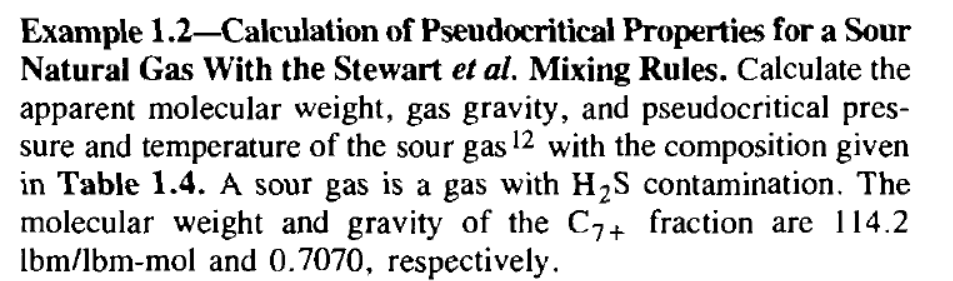

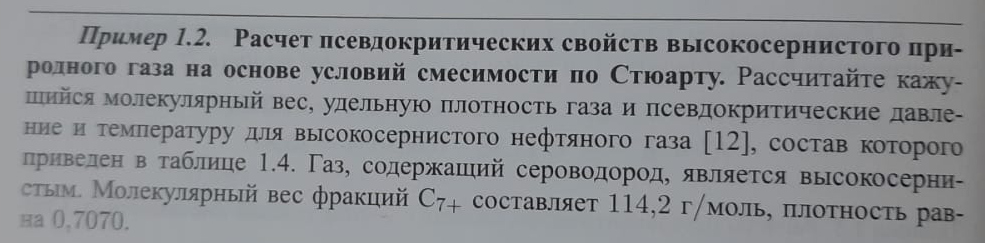

In [45]:
import pandas as pd
import numpy as np

In [46]:
df = pd.read_csv('https://raw.githubusercontent.com/edisonc57/Inzhiniring-gazovykh-rezervuarov/main/%D0%93%D0%BB%D0%B0%D0%B2%D0%B0%2001%20-%20%D0%A1%D0%B2%D0%BE%D0%B9%D1%81%D1%82%D0%B2%D0%B0%20%D0%BF%D1%80%D0%B8%D1%80%D0%BE%D0%B4%D0%BD%D1%8B%D1%85%20%D0%B3%D0%B0%D0%B7%D0%BE%D0%B2/%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5/table%201.4.csv')

In [47]:
df.head

<bound method NDFrame.head of         Component   Mole fraction   Molecular Weight  Critical temperature  \
0        Nitrogen          0.0236             28.013               126.200   
1   Carbon Dioxid          0.0164             44.010                304.21   
2   Acid Sulfuric          0.1841             34.080                373.53   
3          Methan          0.7700             16.043               190.560   
4          Ethane          0.0042             30.070               305.330   
5         Propane          0.0005             44.097               369.850   
6       Iso-Butan          0.0003             58.123                407.85   
7         N-Butan          0.0003             58.123                425.16   
8      Isopentane          0.0001             72.150                460.43   
9       N-pentane          0.0001             72.150                469.71   
10         Hexane          0.0001             86.177                507.37   
11      Heptane +          0.0003 

In [48]:
Tabla=pd.DataFrame(df)

In [49]:
Tabla

,Component,Mole fraction,Molecular Weight,Critical temperature,Critical pressure
0,Nitrogen,0.0236,28.013,126.200,34.000
1,Carbon Dioxid,0.0164,44.010,304.21,73.8
2,Acid Sulfuric,0.1841,34.080,373.53,90
3,Methan,0.7700,16.043,190.560,45.900
4,Ethane,0.0042,30.070,305.330,48.700
5,Propane,0.0005,44.097,369.850,42.500
6,Iso-Butan,0.0003,58.123,407.85,36.4
7,N-Butan,0.0003,58.123,425.16,38.0
8,Isopentane,0.0001,72.150,460.43,33.8
9,N-pentane,0.0001,72.150,469.71,33.7


In [50]:
print(Tabla.dtypes)

Component                 object
 Mole fraction           float64
 Molecular Weight        float64
 Critical temperature     object
 Critical pressure        object
dtype: object


In [51]:
MC7plus= 114.2
GC7plus= 0.7070

In [52]:
#Температура кипения
Tbplus=5/9 * ((4.5579*(MC7plus**0.15178)*(GC7plus**0.15427))**3)
print("Температура кипения : ", round(Tbplus, 3), "K")

Температура кипения :  387.498 K


In [53]:
Tpcplus = 5/9 * ((341.7 + 811 * GC7plus) + ((0.4244 + 0.1174*GC7plus)*(9*Tbplus/5)) +
                 ((0.4669 - 3.2623*GC7plus)*(10**5/(9*Tbplus/5))))
print(round(Tpcplus,3), "K")

558.473 K


In [54]:
Ppplus= 0.06895 * np.exp( 8.3634 -(0.0566/GC7plus) -
                        ((0.24244 + (2.2898/GC7plus) + (0.11857/GC7plus**2)) * (9*Tbplus/5000)) +
                        ((1.4685 + (3.648/GC7plus)+ (0.47227/GC7plus**2))* ((9*Tbplus/5)**2/(10**7))-
                        ((0.42019 + 1.6977/GC7plus**2)* ((9*Tbplus/5)**3/(10**10)))))

print(round(Ppplus,3), "bar или", round(Ppplus*14.5,3), "psia")

25.902 bar или 375.579 psia


In [55]:
print(Tabla.columns.values)

['Component' ' Mole fraction' ' Molecular Weight' ' Critical temperature'
 ' Critical pressure']


In [56]:
#добавляем новые данные в таблицу
Tabla.at[11, ' Critical temperature'] = round(Tpcplus,3)
Tabla.at[11, ' Critical pressure'] = round(Ppplus,2)

In [57]:
Tabla

,Component,Mole fraction,Molecular Weight,Critical temperature,Critical pressure
0,Nitrogen,0.0236,28.013,126.200,34.000
1,Carbon Dioxid,0.0164,44.010,304.21,73.8
2,Acid Sulfuric,0.1841,34.080,373.53,90
3,Methan,0.7700,16.043,190.560,45.900
4,Ethane,0.0042,30.070,305.330,48.700
5,Propane,0.0005,44.097,369.850,42.500
6,Iso-Butan,0.0003,58.123,407.85,36.4
7,N-Butan,0.0003,58.123,425.16,38.0
8,Isopentane,0.0001,72.150,460.43,33.8
9,N-pentane,0.0001,72.150,469.71,33.7


In [58]:
print(Tabla.dtypes)

Component                 object
 Mole fraction           float64
 Molecular Weight        float64
 Critical temperature     object
 Critical pressure        object
dtype: object


In [59]:
Tabla[' Critical temperature'] = pd.to_numeric(df[' Critical temperature'], errors='coerce')
Tabla[' Critical pressure'] = pd.to_numeric(df[' Critical pressure'], errors='coerce')

In [60]:
print(Tabla.dtypes)

Component                 object
 Mole fraction           float64
 Molecular Weight        float64
 Critical temperature    float64
 Critical pressure       float64
dtype: object


In [61]:
# valor = df.loc[i, 'j']

#Коэффициенты Fj, Ej и  Ek
Mfplus= Tabla.iloc[11, 1] #[Row, Column]
Tcplus= Tabla.iloc[11, 3]
Pcplus= Tabla.iloc[11, 4]
print(Mfplus, Tcplus, Pcplus)

0.0003 558.473 25.9


In [62]:
Fj= 0.0414*(Mfplus*Tcplus/Pcplus) + 0.0827*(Mfplus**2*Tcplus/Pcplus)
Ej =0.6081*Fj + 1.1325*Fj**2 - 14.004*Fj*Mfplus + 64.434*Fj*Mfplus**2
Ek= 0.47265*(Tcplus/np.sqrt(Pcplus))*(0.3129*Mfplus - 4.8156*Mfplus**2 + 27.3751*Mfplus**3)

print("{:.5e}".format(Fj), round(Ej, 6), round(Ek, 5))


2.67969e-04 0.000162 0.00485


In [63]:
#Parameters J and K
Tabla['Part1']= round((Tabla[' Mole fraction'] * Tabla[' Critical temperature']/Tabla[' Critical pressure']),4)
Tabla['Part2'] = round((Tabla[' Mole fraction']* np.sqrt(Tabla[' Critical temperature']/Tabla[' Critical pressure'])),4)
Tabla['Part3']= round((Tabla[' Mole fraction']* Tabla[' Critical temperature']/ np.sqrt(Tabla[' Critical pressure'])),4)

In [64]:
Tabla

,Component,Mole fraction,Molecular Weight,Critical temperature,Critical pressure,Part1,Part2,Part3
0,Nitrogen,0.0236,28.013,126.200,34.0,0.0876,0.0455,0.5108
1,Carbon Dioxid,0.0164,44.010,304.210,73.8,0.0676,0.0333,0.5807
2,Acid Sulfuric,0.1841,34.080,373.530,90.0,0.7641,0.3751,7.2487
3,Methan,0.7700,16.043,190.560,45.9,3.1968,1.5689,21.6579
4,Ethane,0.0042,30.070,305.330,48.7,0.0263,0.0105,0.1838
5,Propane,0.0005,44.097,369.850,42.5,0.0044,0.0015,0.0284
6,Iso-Butan,0.0003,58.123,407.850,36.4,0.0034,0.0010,0.0203
7,N-Butan,0.0003,58.123,425.160,38.0,0.0034,0.0010,0.0207
8,Isopentane,0.0001,72.150,460.430,33.8,0.0014,0.0004,0.0079
9,N-pentane,0.0001,72.150,469.710,33.7,0.0014,0.0004,0.0081


In [65]:
#Parameters J and K
J= 0.0414* (Tabla['Part1'].sum()) + 0.0827* (Tabla['Part2'].sum())**2
K= 0.47265* (Tabla['Part3'].sum())

print(round(J, 4), round(K,2))

0.5164 14.33


In [66]:
#J и K correcting
Jcorr= J- Ej
Kcorr= K - Ek

print(Jcorr, Kcorr)

0.5162144312722644 14.320891586447043


In [67]:
#Псевдокритические T и P
Tpc= (Kcorr**2/Jcorr)
Ppc= (Tpc/Jcorr)

print('Pseudocritical Temperature', round(Tpc,1), 'R')
print('Pseudocritical Pressure', round(Ppc,2), 'psia')

Pseudocritical Temperature 397.3 R
Pseudocritical Pressure 769.63 psia


In [68]:
#apparent molecular weight - кажущаяся молекулярная вес
Tabla['Apparent MW']= Tabla[' Mole fraction'] * Tabla[' Molecular Weight']

In [69]:
Tabla

,Component,Mole fraction,Molecular Weight,Critical temperature,Critical pressure,Part1,Part2,Part3,Apparent MW
0,Nitrogen,0.0236,28.013,126.200,34.0,0.0876,0.0455,0.5108,0.661107
1,Carbon Dioxid,0.0164,44.010,304.210,73.8,0.0676,0.0333,0.5807,0.721764
2,Acid Sulfuric,0.1841,34.080,373.530,90.0,0.7641,0.3751,7.2487,6.274128
3,Methan,0.7700,16.043,190.560,45.9,3.1968,1.5689,21.6579,12.353110
4,Ethane,0.0042,30.070,305.330,48.7,0.0263,0.0105,0.1838,0.126294
5,Propane,0.0005,44.097,369.850,42.5,0.0044,0.0015,0.0284,0.022049
6,Iso-Butan,0.0003,58.123,407.850,36.4,0.0034,0.0010,0.0203,0.017437
7,N-Butan,0.0003,58.123,425.160,38.0,0.0034,0.0010,0.0207,0.017437
8,Isopentane,0.0001,72.150,460.430,33.8,0.0014,0.0004,0.0079,0.007215
9,N-pentane,0.0001,72.150,469.710,33.7,0.0014,0.0004,0.0081,0.007215


In [70]:
#Apparent molecular weight Gas - Кажущийся молекулярный вес Газа
M=Tabla['Apparent MW'].sum()
print('Кажущийся молекулярный вес Газа: {:.2f}'.format(M), 'lbm/lbm-mol либо г/моль')

Кажущийся молекулярный вес Газа: 20.25 lbm/lbm-mol либо г/моль


In [71]:
#Specific gravity - Удельная плотность газовой смеси
SGm = M/28.96
print("Удельная плотность газовой смеси: {:.4f}".format(SGm))

Удельная плотность газовой смеси: 0.6993


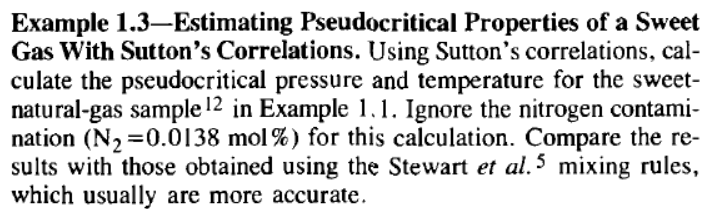

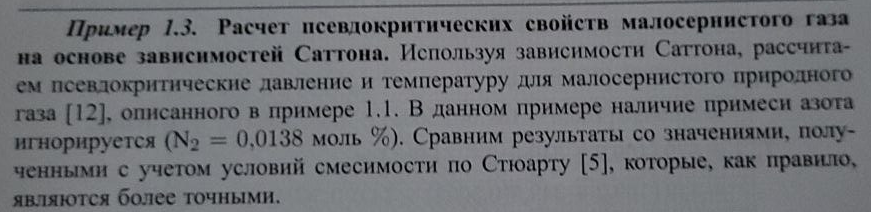

In [72]:
import numpy as np
import matplotlib.pyplot as plt

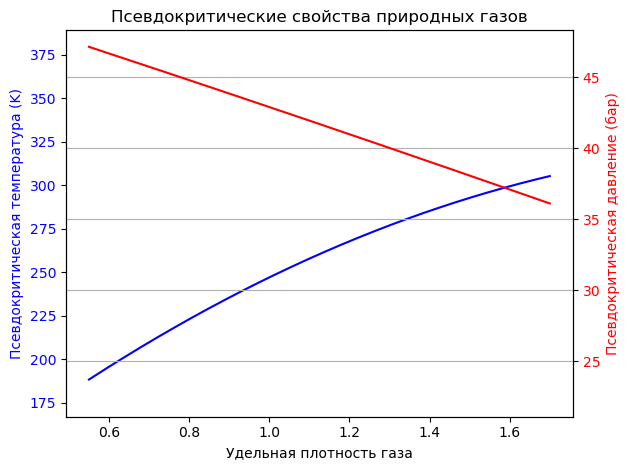

In [73]:
def Sutton_function(SGG):
    Ppch= 0.06895*(756.8 - 131*SGG - 3.6*SGG*SGG)
    Tpch= 5/9*(169.2 + 349.5*SGG - 74*SGG*SGG)
    return (Ppch, Tpch)

Ppch_values = []
Tpch_values = []

SGG= np.linspace(0.55,1.7,1000)

for i in SGG:
    Ppch, Tpch = Sutton_function(i)
    Ppch_values.append(Ppch)
    Tpch_values.append(Tpch)


fig, ax1 = plt.subplots()

ax1.plot(SGG, Tpch_values , 'b-')
ax1.set_xlabel('Удельная плотность газа')
ax1.set_ylabel('Псевдокритическая температура (K)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_ylim([167, 389])

ax2 = ax1.twinx()
ax2.plot(SGG, Ppch_values, 'r-')
ax2.set_ylabel('Псевдокритическая давление (бар)', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.set_ylim([21.1, 48.3])

plt.title('Псевдокритические свойства природных газов')
fig.tight_layout()
plt.grid (True)
plt.show()

In [74]:
# Удельная плотность газовой смеси: 0.61
SGm = 0.61

In [75]:
#Удельная плотность газовой смеси в примере 1.1
# from Functions.Sutton import Sutton_function

# Sutton_function (SGm)



In [76]:
def Sutton_function(SGG):
    Ppch= round((0.06895*(756.8 - 131*SGG - 3.6*SGG*SGG)),2)
    Tpch= round((5/9*(169.2 + 349.5*SGG - 74*SGG*SGG)),2)
    return (Ppch, Tpch)

Ppch, Tpch = Sutton_function(SGm)
#мы игнорируем присутствие азота поэтому псевдокритические давление и температуру газовой смеси можно описать Ppc = Ppch и Tpc = Tpch

print("псевдокритические давление ", Ppch, 'бар')
print("псевдокритическая температура", Tpch, 'K')


псевдокритические давление  46.58 бар
псевдокритическая температура 197.14 K


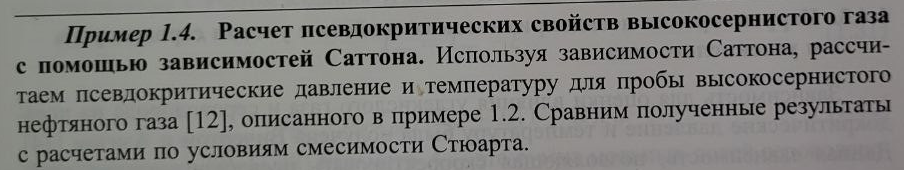

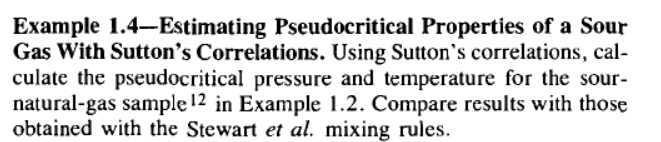

*Формула Саттона когда газ содержитболее 12 мольных процентов CO2, 3 мольных процентов N2 или H2S*
$$
\gamma_h= \frac{\gamma_w - 1.1767*y_{H_2S} - 1.5196*y_{CO_2} -0.9672*y_{N_2} - 0.6220*y_{H_20}} {1 - y_{H_2S} - y_{CO_2} - y_{N_2} -y_{H_20} } 
$$

**

*Формула Саттона включая примеси газа* 
$$
P_{pc} = (1 - y_{H_2S} - y_{CO_2} - y_{N_2} -y_{H_20}) p_{pch} + 0.06895(1306 y_{H_2S} + 1071 y_{CO_2} + 493.1 y_{N_2} + 3200.1y_{H_2O})
$$

$$
T_{pc} = (1 - y_{H_2S} - y_{CO_2} - y_{N_2} -y_{H_20}) t_{pch} + 5/9(672.35y_{H_2S} + 547.58 y_{CO_2} + 227.16 y_{N_2} + 1164.9y_{H_2O})
$$

In [77]:
# Удельная плотность
grav_h2s= Tabla.iloc[2, 1] #[Row, Column]
grav_co2= Tabla.iloc[1, 1]
grav_n2= Tabla.iloc[0, 1]
print(grav_h2s, grav_co2, grav_n2)

0.1841 0.0164 0.0236


In [78]:
Yh = (SGm - 1.1767*grav_h2s - 1.5196*grav_co2 - 0.9672*grav_n2 )/ (1 - grav_h2s - grav_co2 - grav_n2)
print(round(Yh,4))

0.4454


In [79]:
def Sutton_function(SGG):
    Ppch= round((0.06895*(756.8 - 131*SGG - 3.6*SGG*SGG)),2)
    Tpch= round((5/9*(169.2 + 349.5*SGG - 74*SGG*SGG)),2)
    return (Ppch, Tpch)

Ppch, Tpch = Sutton_function(Yh)

In [80]:
#псевдокритические давление и температуа угл. компонентов
Ppc = (1- grav_h2s - grav_co2 -grav_n2)*Ppch + 0.0685*(1306*grav_h2s + 1071*grav_co2 +493.1* grav_n2)
# print( round(Ppc, 2))
Tpc = (1- grav_h2s - grav_co2 -grav_n2)*Tpch + 5/9*(672.35*grav_h2s + 547.58*grav_co2 +227.16*grav_n2) 

print('псевдокритические давление ', round(Ppc,2),'бар')
print("псевдокритическая температура", round(Tpc,2), 'K')

псевдокритические давление  55.8 бар
псевдокритическая температура 210.44 K


# Корректпровка псевдокритических свойства

$$
\xi = 66.7(A^{0.9} - A^{1.6}) + 8.3(B^{0.5} - B^{4})
$$

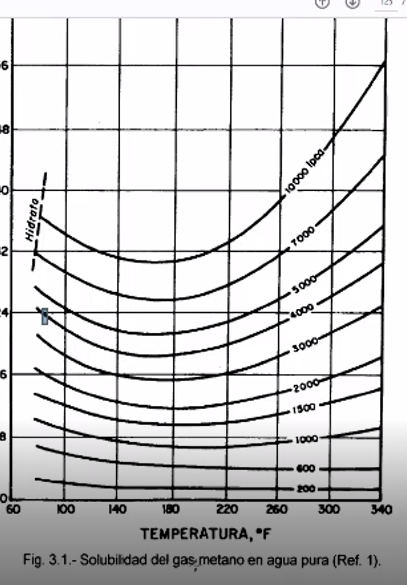

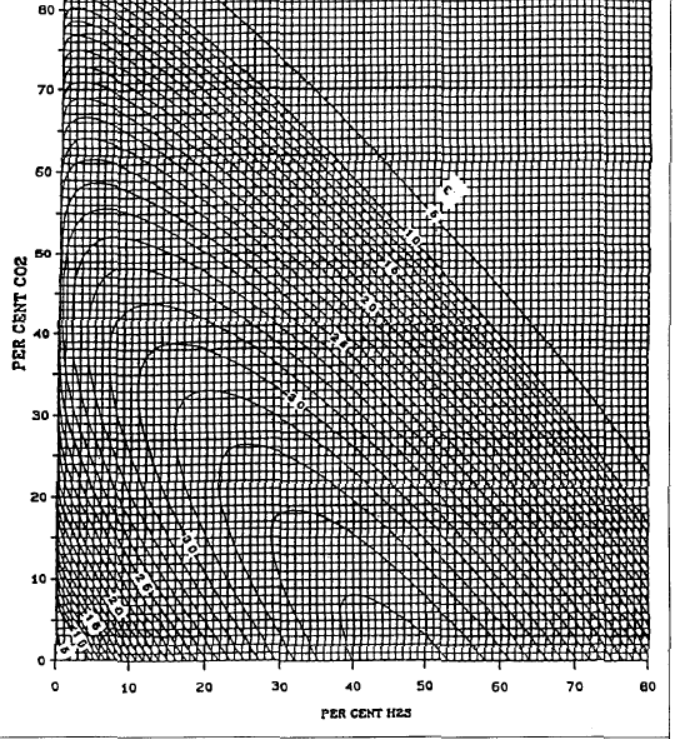

13.6039324


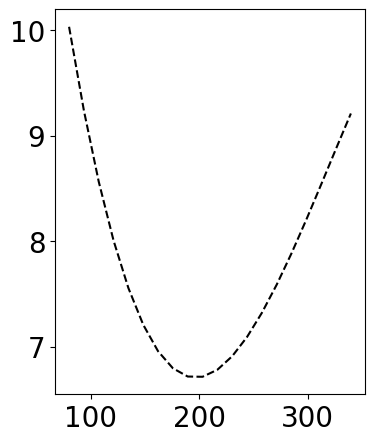

In [6]:
# -*- coding: utf-8 -*-
"""
Created on Wed Aug 28 09:32:45 2019
@author: leo
"""


import numpy as np
import matplotlib.pyplot as plt

# def Rswp_CulbersonMcketta(p,T):
#     A = 8.15839-6.12265E-02*T+1.91663E-04*T**2.0-2.1654E-07*T**3.0
#     B = 1.01021E-02-7.44241E-05*T+3.05553E-07*T**2.0-2.94883E-10*T**3.0
#     C = (-9.02505+0.130237*T-8.53425E-04*T**2.0
#          +2.34122E-06*T**3.0-2.37049E-09*T**4.0)*1E-07
    
#     Rswp = A+B*p+C*p**2.0
#     return (Rswp)


def Rsw_CulbersonMcketta(p,T,S):
    A = 8.15839-6.12265E-02*T+1.91663E-04*T**2.0-2.1654E-07*T**3.0
    B = 1.01021E-02-7.44241E-05*T+3.05553E-07*T**2.0-2.94883E-10*T**3.0
    C = (-9.02505+0.130237*T-8.53425E-04*T**2.0+2.34122E-06*T**3.0-2.37049E-09*T**4.0)*1E-07
    
    Rswp = A+B*p+C*p**2.0
    Rsw = 10**(-0.0840655*S*T**-0.285854)*Rswp
    return (Rsw)

print(Rswp_CulbersonMcketta(2000.0,100.0))
    

press=np.linspace(1000, 10000, 10)
Temp=np.linspace(80, 340, 20)
Rswp=np.zeros(len(Temp))   
Rsw=np.zeros(len(Temp))   

# plt.figure("Rsw")  
plt.figure("Rsw", figsize=(4,5))    
plt.rcParams.update({'font.size':20})

Rswp[::]=Rswp_CulbersonMcketta(press[0],Temp[::]) #Va aumentando conforme va recorriendo cada press y cada temp
plt.plot(Temp,Rswp,'k--')



# for i in range(0,len(press)):
#     Rswp[::]=Rswp_CulbersonMcketta(press[i],Temp[::])
    #Rsw[::]=Rsw_CulbersonMcketta(press[i],Temp[::],10.)
    # plt.plot(Temp,Rswp,'k--')
    # plt.text(200, np.min(Rswp), str(press[i]), fontsize=10, color='red')

    #plt.plot(Temp,Rsw, 'b-')

#Rs=Rswp_CulbersonMcketta(press[0],Temp[0])
#print (Rs)
#Rswp[::]=Rswp_CulbersonMcketta(press[0],Temp[::])

# plt.title('Rsw-CulbersonMcketta', fontsize=15, color=[1,0,1])
# plt.xlabel('Temperatura °F', fontsize=15, color='red')
# plt.ylabel('Rwsp', fontsize=15, color='blue')
# plt.grid('True')
# plt.minorticks_on()
# plt.grid(b=True, which='minor', color='g', linestyle='--')
# #plt.rc('xtick', labelsize=20)  
# plt.savefig('CulbersonMcketta.png',dpi=300)

#fig, ax1 = plt.subplots(figsize=(4,5))
#color = 'tab:green'
#ax1.set_xlabel('Temperatura °F')
#ax1.set_ylabel('Rwsp', color=color)
#
#for i in range(0,len(press)):
#    Rswp[::]=Rswp_CulbersonMcketta(press[i],Temp[::])
#    ax1.plot(Temp, Rswp, 'r--')
#    ax1.tick_params(axis='y', labelcolor=color)
#    
#ax2 = ax1.twinx() 
#color = 'tab:blue'
#ax2.set_ylabel('Rws', color=color)
#
#for i in range(0,len(press)):
#    Rsw[::]=Rsw_CulbersonMcketta(press[i],Temp[::],10)
#    ax2.plot(Temp, Rsw, 'b-')
#    ax2.tick_params(axis='y', labelcolor=color)
#
#plt.savefig('CulbersonMcketta.png',dpi=300)
#
#ay3 = ax1.twiny() 
#color = 'tab:blue'
#ay3.set_xlabel('Temperatura °C')
